<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>



# **Performing Linear Regression in Keras**


During the pandemic, a bike-sharing service had suffered considerable losses in their revenues. As a data scientist on the analytics team, you have been tasked to help with coming up with a business plan to accelerate the company's revenue. The first step in this process is to understand the current demand for shared bikes among the people in the city.

You recommend that the team first try to understand the factors on which the demand for these shared bikes depends. In this lab, we will perform a linear regression to predict the count of total rental bikes, and understand the impact of some contributing factors.

<center>
    <img src="https://live.staticflickr.com/36/84666910_b889a5ad04_b.jpg" width="300" alt="tulip flower">
<center>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Linear regression">Linear regression</a>
        <ol>
            <li><a href="#Bike-sharing-dataset">Bike sharing dataset</a></li>
            <li><a href="#Clean-the-data">Clean the data</a></li>
            <li><a href="#Data-exploration-:-Bivariate-analysis">Data exploration: Bivariate analysis</a></li>
            <li><a href="#Data exploration-:-Multivariate-analysis">Data exploration: Multivariate analysis</a></li>
            <li><a href="#Data exploration-:-Heatmap-of-columns">Data exploration: Heatmap of columns</a></li>
            <li><a href="#Split-the-data-into-training-and-test sets">Split the data into training and test sets</a></li>
            <li><a href="#Split-features-from-labels">Split features from labels</a></li>
            <li><a href="#Normalization">Normalization</a></li>
            <li><a href="#Linear-regression-with-a-single-input">Linear regression with a single input</a></li>
            <li><a href="#Linear-regression-with-a-multiple-inputs">Linear regression with a multiple inputs</a></li>
        </ol>
    </li>
</ol>

<a href="#Exercises">Exercises</a>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(Auto-MPG)">Exercise 1. Loading a dataset (Auto MPG)</a></li>
    <li><a href="#Exercise-2---Clean-the-data">Exercise 2. Clean the data</a></li>
    <li><a href="#Exercise-3---Split-the-data">Exercise 3. Split the data</a></li>
    <li><a href="#Exercise-4---Create-a-normalization-layer">Exercise 4. Create a normalization layer</a></li>
    <li><a href="#Exercise-5---Linear-regression-with-multiple-inputs">Exercise 5. Linear regression with multiple inputs</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

 - Build single-variable and multi-variable linear regression models using Keras.
 - Use linear regression to predict a continuous target variable given a set of input features


## Setup


### Importing Required Libraries

_We recommend you import all required libraries in one place, as follows:_


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import skillsnetwork
from sklearn.metrics import mean_squared_error

In [2]:
import warnings

warnings.simplefilter('ignore')

In [3]:
sns.set_context('notebook')
sns.set_style('white')

## Linear Regression


Linear Regression models are typically used to study the relationship between a single dependent variable $Y$ and one or more independent variable $X$. 

They have an easy-to-interpret mathematical formula that can generate predictions. A simple linear regression model can be used when working with one independent variable, and a multiple regression model can be used when there are more than one independent variables.

We can start with a hypothesis that resembles the line, $Y=\theta_0X+\theta_1$, where $\theta_0$ and $\theta_1$ are the regression coefficients.

Now how do we pick the values of ($\theta_0$) and ($\theta_1$) so that our model predictions are accurate?

We use an optimization method to minimize the loss function so as to reduce the error between model predictions and the ground truth. We start by picking random values of ($\theta_0$) and ($\theta_1$), and continue to update values of the coefficients till convergence. If our loss function stops decreasing, we have reached our local minima.

In multiple linear regression, we use more than one independent features ($X$) and a single dependent feature ($Y$). If we have $n$ features, our formula is as follows. Instead of considering a vector of ($m$) data entries, we will consider the ($n X m$) matrix of $X$.

$Y=\theta_0+\theta_1X_1+\theta_2X_2+\theta_3X_3+...++\theta_nX_n$


### Bike sharing dataset

We will be using the bike-sharing dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01). It contains the following features:

> - instant: record index
> - dteday : date
> - season : season (1:winter, 2:spring, 3:summer, 4:fall)
> - yr : year (0: 2011, 1:2012)
> - mnth : month ( 1 to 12)
> - hr : hour (0 to 23)
> - holiday : weather day is holiday or not (extracted from [Web Link](https://dchr.dc.gov/page/holiday-schedules?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01))
> - weekday : day of the week
> - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
> - weathersit :(1) Clear, Few clouds, Partly cloudy, Partly cloudy, (2) Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, (3) Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, (4) Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
> - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 
> - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
> hum: Normalized humidity. The values are divided to 100 (max)
> windspeed: Normalized wind speed. The values are divided to 67 (max)
> casual: count of casual users
> registered: count of registered users
> cnt: count of total rental bikes including both casual and registered


In [5]:
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L2/data/Bike-Sharing-Dataset.zip", overwrite=True)

  0%|          | 0/3 [00:00<?, ?it/s]

Saved to '.'


In [6]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Clean the data 


Let us drop the `dteday` column as it is not numerical, and we already have some other date like features like `mnth`, `year` and `weekday`.

We will remove `instant` as it is just a row instance identifier.

We will also drop `registered` and `casual` as they are used to compute our target variable `cnt` and including them would result in data leakage.


In [7]:
df.drop(columns=['dteday', 'instant', 'registered', 'casual'], inplace=True)

### Data exploration: Bivariate analysis


We will create scatterplots for a few numerical variables against the target variable `cnt`.


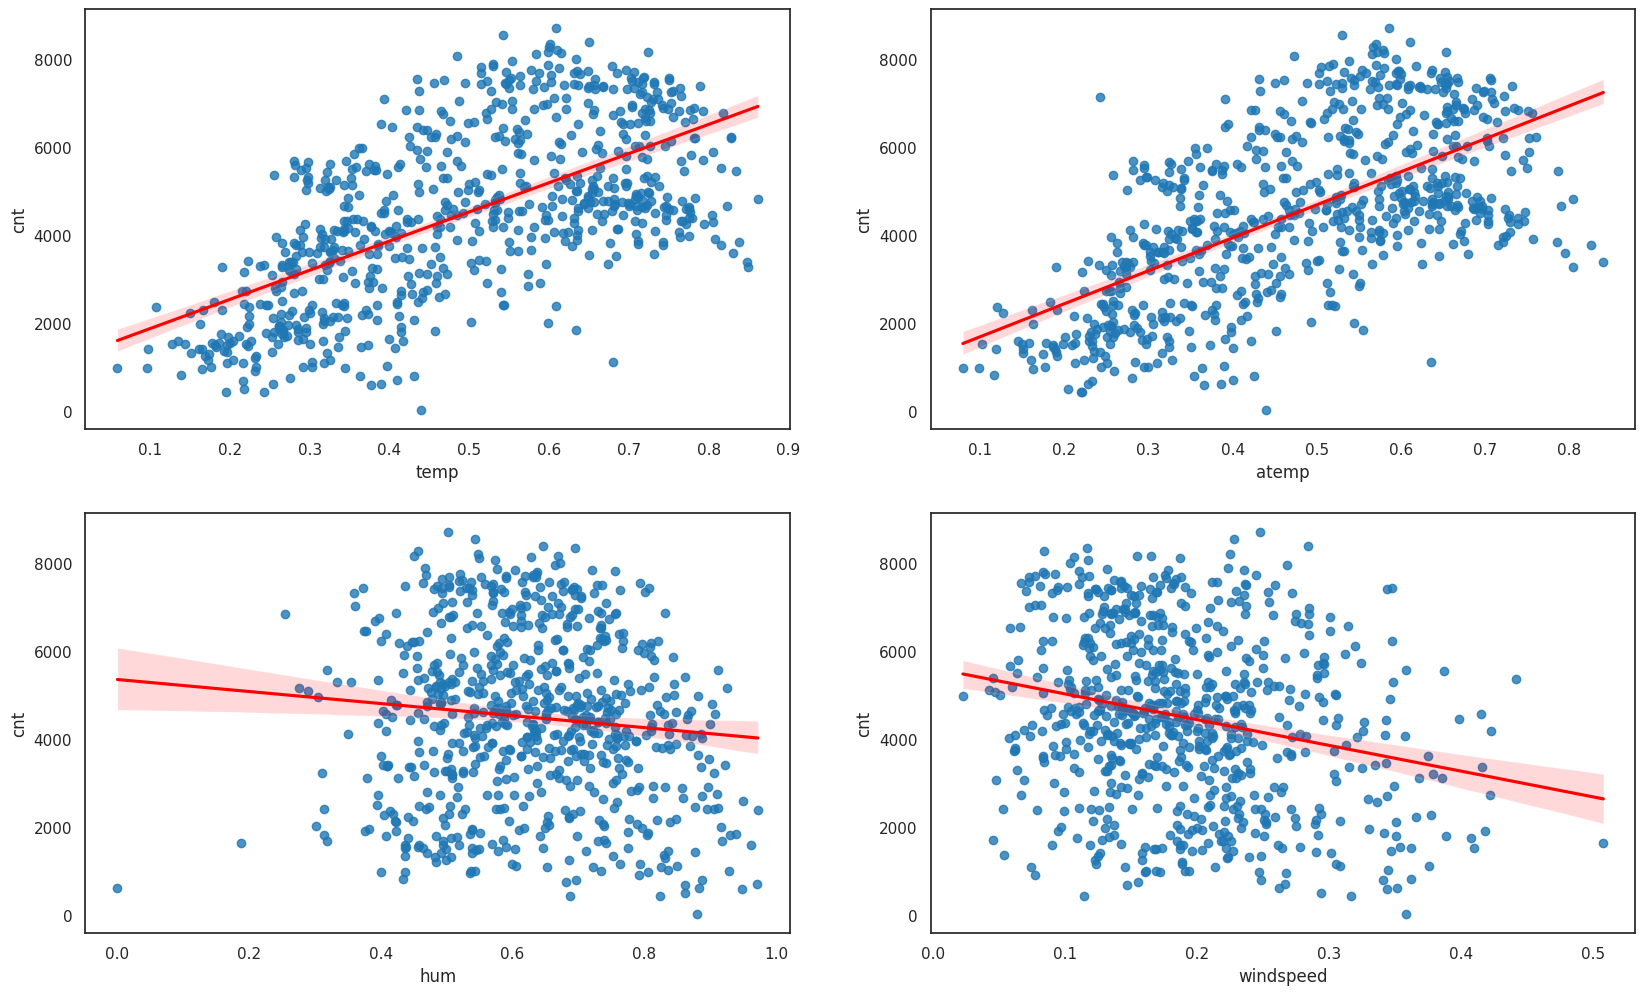

In [9]:
col = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20, 12))

for i in enumerate(col):
    plt.subplot(2, 2, i[0] + 1)
    sns.regplot(data=df, x=i[1], y='cnt', line_kws={'color': 'red'})

plt.show()

Similarly, we can perform a bivariate analysis on the categorical variables.


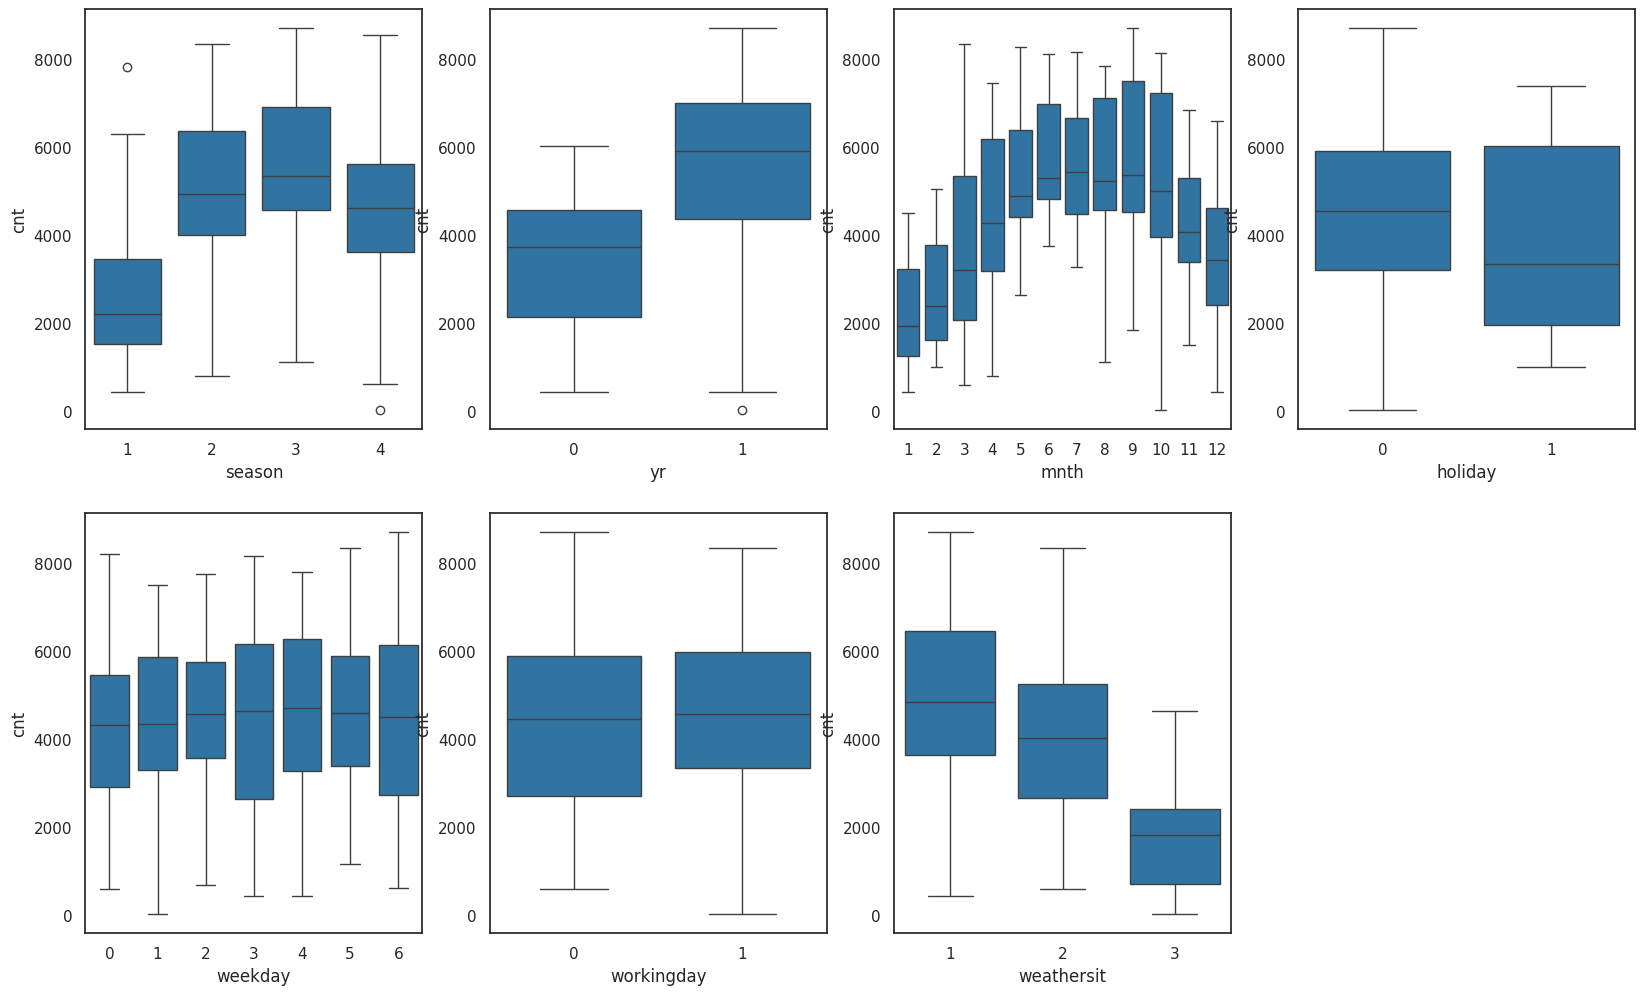

In [10]:
col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(20, 12))

for i in enumerate(col):
    plt.subplot(2, 4, i[0] + 1)
    sns.boxplot(data=df, x=i[1], y='cnt')

plt.show()

From this we infer that rental bike demands are the highest during Fall and lowest during Spring. There was an increase in demand in bikes in 2019 as compared to 2018. A higher demand for bikes is observed on non-holidays as compared to holidays. Lastly, when renting bikes, clear weather is preferred over light rain, thunderstorm and snowy days.


### Data exploration: Multivariate analysis


We can perform multivariate analysis by creating a pairplot of all the columns in our dataset. 


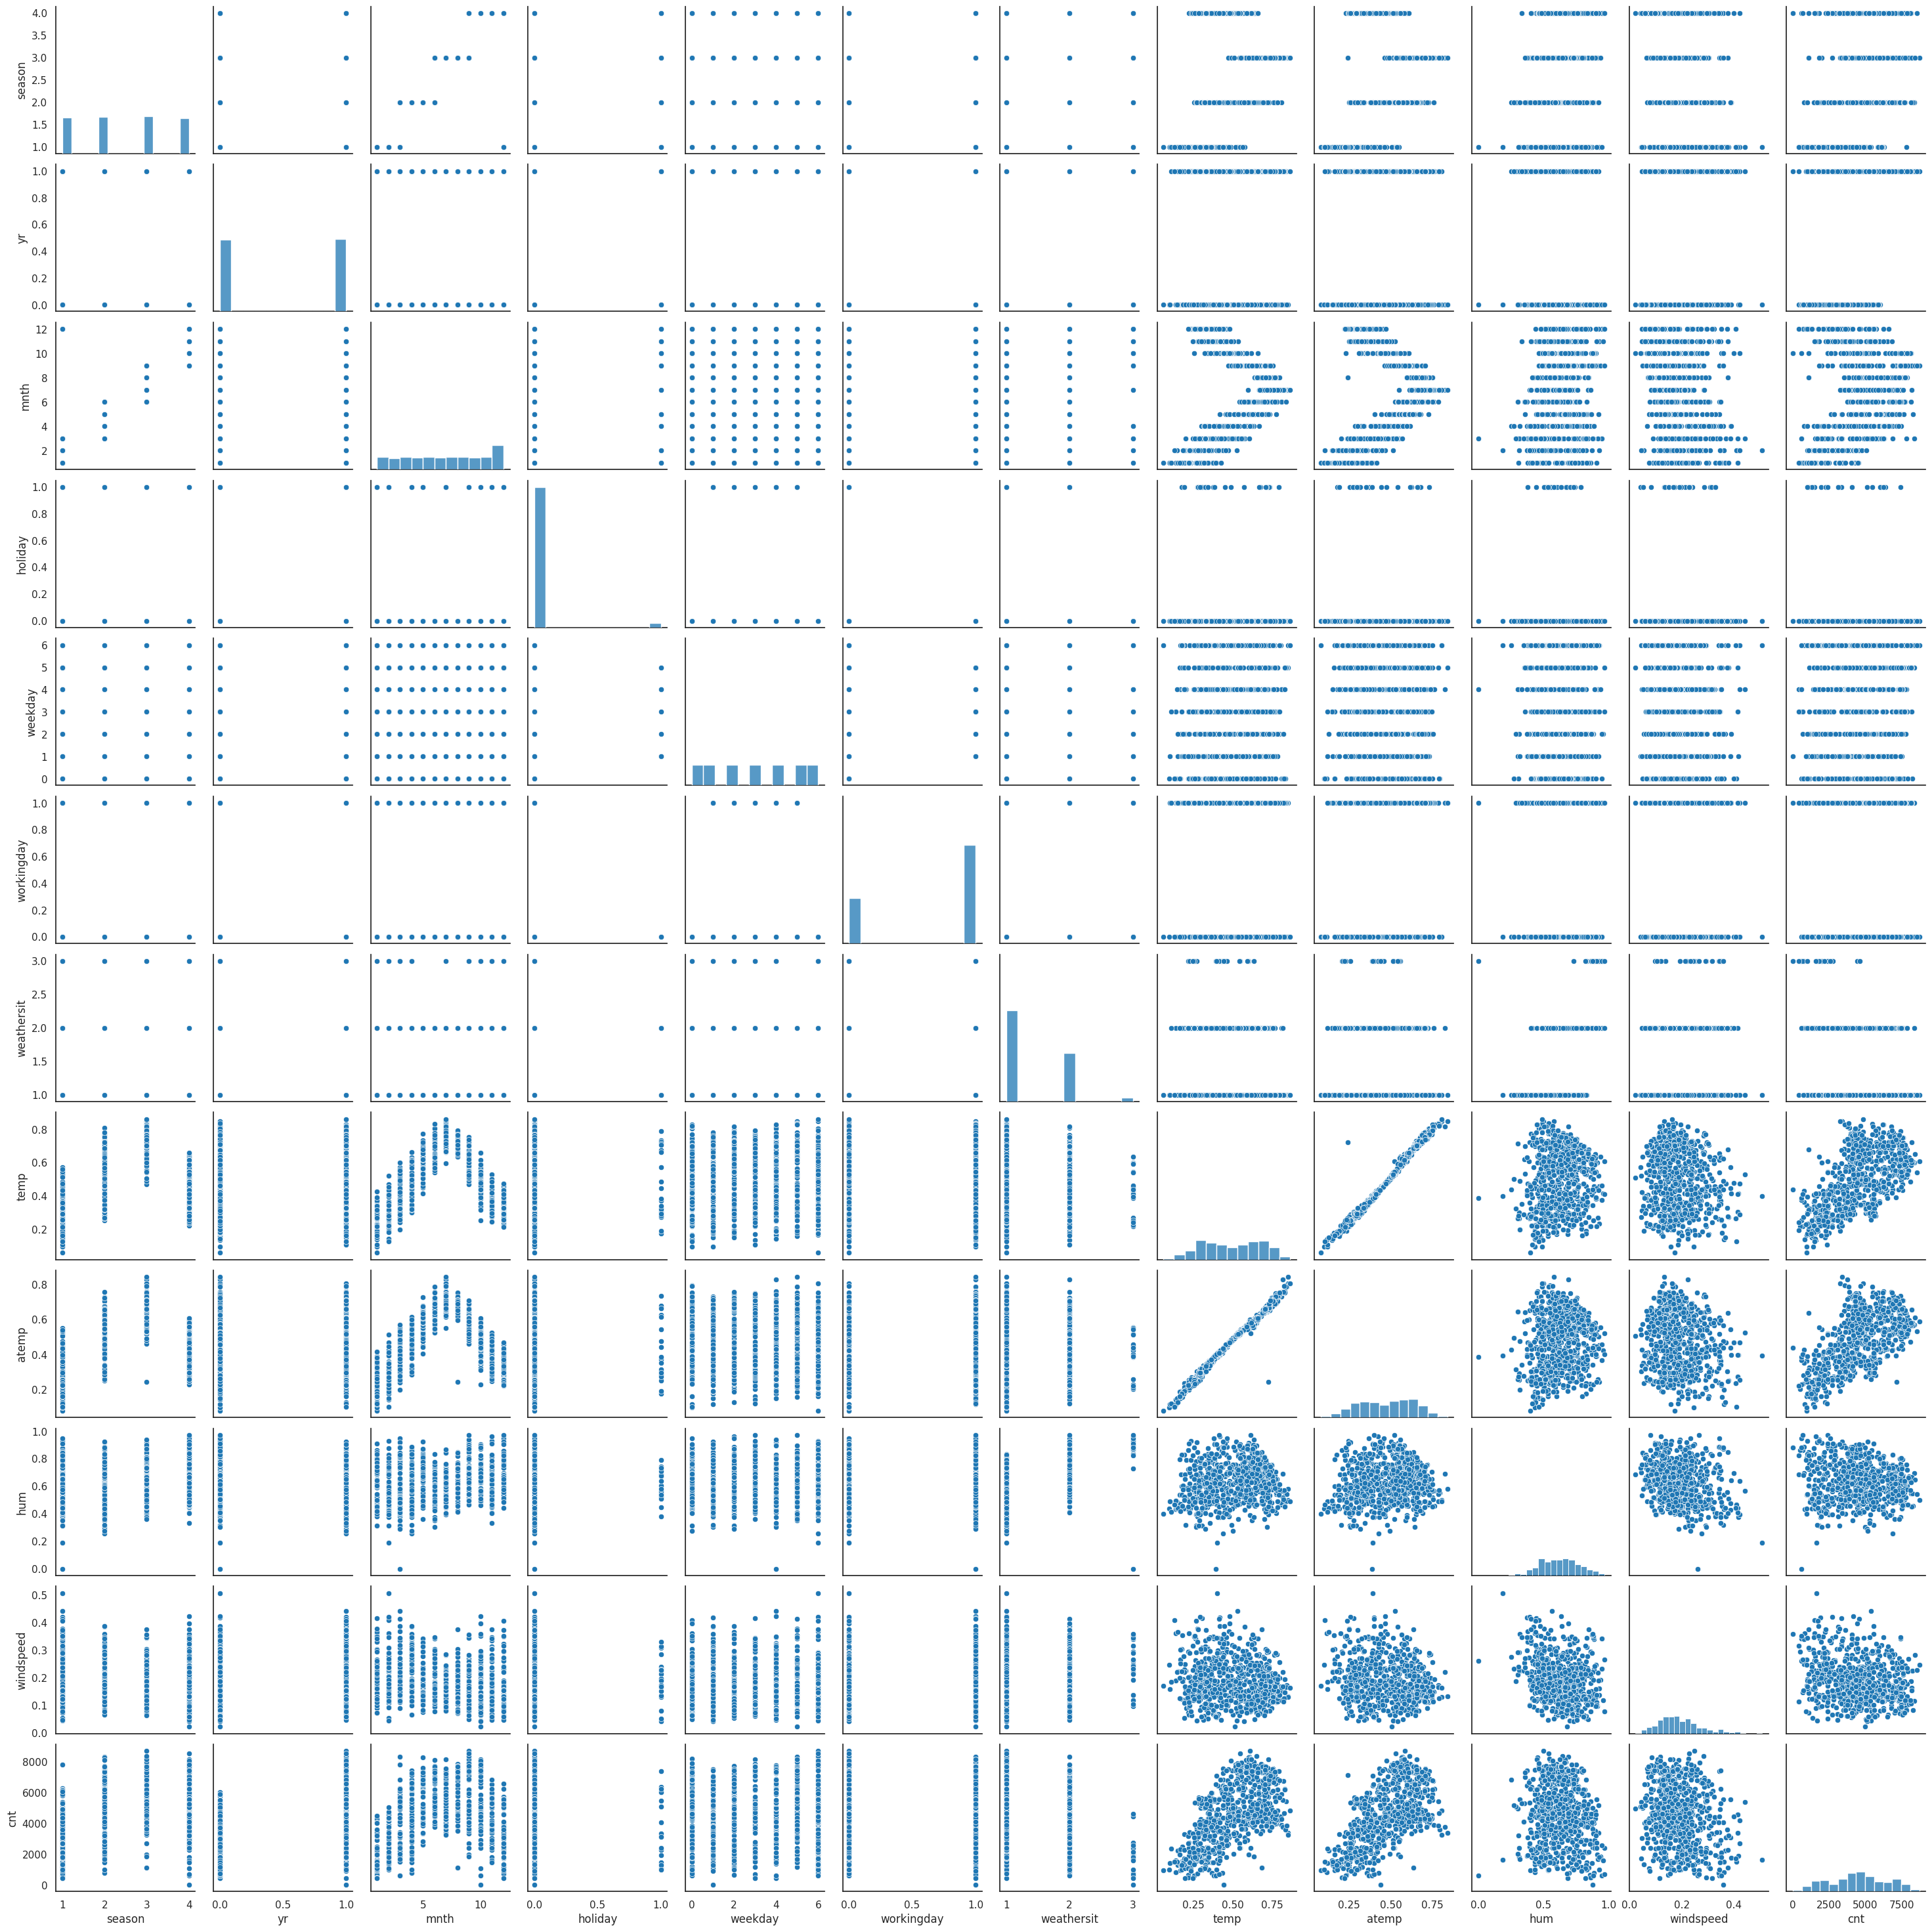

In [11]:
sns.pairplot(df)

### Data exploration: Heatmap of columns


Using a heatmap we can explore which variables are positively or negatively correlated with one another.


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'season'),
  Text(1.5, 0, 'yr'),
  Text(2.5, 0, 'mnth'),
  Text(3.5, 0, 'holiday'),
  Text(4.5, 0, 'weekday'),
  Text(5.5, 0, 'workingday'),
  Text(6.5, 0, 'weathersit'),
  Text(7.5, 0, 'temp'),
  Text(8.5, 0, 'atemp'),
  Text(9.5, 0, 'hum'),
  Text(10.5, 0, 'windspeed'),
  Text(11.5, 0, 'cnt')])

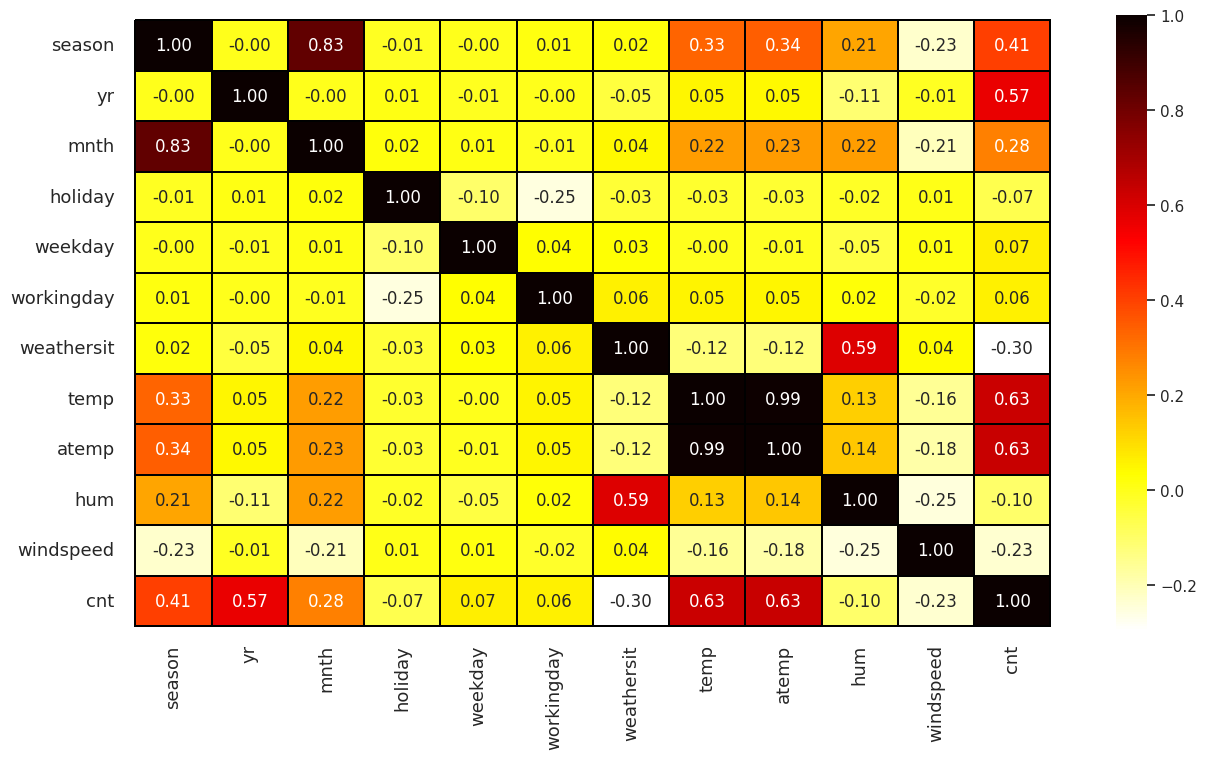

In [14]:
plt.figure(figsize=(15, 8))
fig = sns.heatmap(df.corr(), cmap='hot_r',
                  annot=True, linecolor='black', linewidths=0.01, annot_kws={'fontsize': 12}, fmt='0.2f')
top, bottom = fig.get_ylim()
fig.set_ylim(top + 0.1, bottom - 0.1)

left, right = fig.get_xlim()
fig.set_xlim(left - 0.1, right + 0.1)

plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=90)

From the heatmap, we can infer that `temp` and `atemp` are highly correlated with each other and with `cnt`.

A positive correlation between `temp`, `atemp`, `yr` and `cnt` exists, while a negative correlation between `windspeed`, `hum`, `weathersit`, `holiday` and `cnt` exists.


### Split the data into training and test sets


Now we will split the data set into a training set and a test set. The test set will be used in the final evaluation of your models.


In [15]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

### Split features from labels


Separate the target value from the features. This label is the value that you will train the model to predict.


In [16]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('cnt')
test_labels = test_features.pop('cnt')

### Normalization


Since the features in this dataset use different scales and ranges, it is generally considered good practice to normalize the features before performing linear regression. This is partly because the features are multiplied by model weights, and the scale of the outputs and gradients are impacted by that of the inputs. Even though it is possible for the model to converge without any feature normalization, the process of normalization makes the training much more stable.


We will use `tf.keras.layers.Normalization` as a clean and simple way to add feature normalization to our model.

Let us first create a normalization layer. We will use `axis=-1` as an input argument. As per the [Keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01): 

> The axis or axes that should have a separate mean and variance for each index in the shape. For example, if shape is (None, 5) and axis=1, the layer will track 5 separate mean and variance values for the last axis. If axis is set to None, the layer will normalize all elements in the input by a scalar mean and variance. Defaults to -1, where the last axis of the input is assumed to be a feature dimension and is normalized per index. 


In [17]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Now using `normalization.adapt`, we will fit the state of the pre-processing layer to the training data.

This will compute the mean and variance of the data and store them as the layer's weights.


In [18]:
normalizer.adapt(np.array(train_features))

Calculate the mean and variance:


In [19]:
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

[[2.4820514  0.50598294 6.557265   0.02735043 2.9931624  0.6803419
  1.4        0.49609548 0.47542128 0.6289289  0.19085288]]
[[1.2274556e+00 2.4996421e-01 1.1894584e+01 2.6602382e-02 4.0580730e+00
  2.1747680e-01 2.9811966e-01 3.2840721e-02 2.6041929e-02 2.0187266e-02
  6.0876710e-03]]


### Linear regression with a single input


We can build a linear regression model using one or several variables.


Let us begin by building a single-variable linear regression to predict `'cnt'` from `'temp'`. We are using `temp` because it is highly correlated with `cnt` and should be highly predictive.

We will use Keras to define a `tf.keras.Sequential` model architecture.

Here are the steps we will follow to create our single-variable linear regression model:

- Using the `tf.keras.layers.Normalization` preprocessing layer that we created earlier, we will normalize the `'temp'` input features.
- Then we will apply a linear transformation to produce 1 output using a linear layer `tf.keras.layers.Dense`.


Note that as per the documentation, the input can either be set by the `input_shape` argument, or automatically when the model is run for the first time.


In [20]:
temp = np.array(train_features['temp'])

In [21]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
temp_normalizer.adapt(temp)

In [22]:
temp_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(units=1)
])

In [23]:
temp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

Now, let us configure the training procedure using `model.compile()`. Here, `loss` is used to define the loss function, which computes the quantity that a model should seek to minimize during training. And `optimizer` defines the optimizer that is used to change weights and learning rate during training to minimize losses.


In [24]:
temp_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='mean_squared_error'
)

In [27]:
temp_hist = temp_model.fit(
    train_features['temp'],
    train_labels,
    verbose=False,
    epochs=100,
    validation_split=0.2
)

In [28]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid(True)

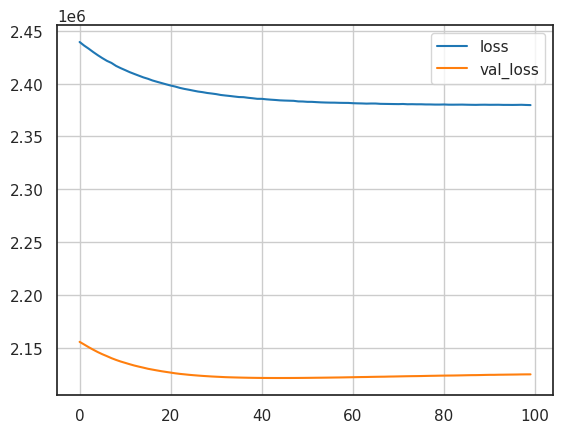

In [29]:
plot_loss(temp_hist)

In [30]:
y_pred = temp_model.predict(test_features['temp'])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [31]:
print(np.sqrt(mean_squared_error(test_labels, y_pred)))

1431.3236183135118


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


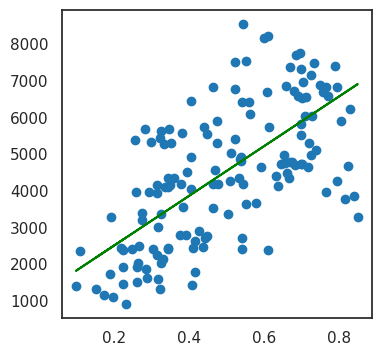

In [32]:
plt.figure(figsize=(4, 4))
plt.plot(test_features['temp'], test_labels, 'o',
         test_features['temp'], temp_model.predict(test_features['temp']), 'g')
plt.show()

### Linear regression with multiple inputs


We will create a similar setup to predict `cnt` based on multiple inputs. In this case, in our $y = mx+b$ equation, $m$ will be a matrix and $b$ will be a vector.

Similar to what we did before, the Sequential model will have `normalizer` as the first layer, and `Dense` as the second layer:


In [35]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [36]:
linear_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='mean_squared_error'
)

In [37]:
linear_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ ?                      │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

In [38]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # to view the logs, uncomment this:
    verbose=0,
    # validation split: 20% of the training data.
    validation_split=0.2)

CPU times: user 15.3 s, sys: 2.95 s, total: 18.2 s
Wall time: 16.1 s


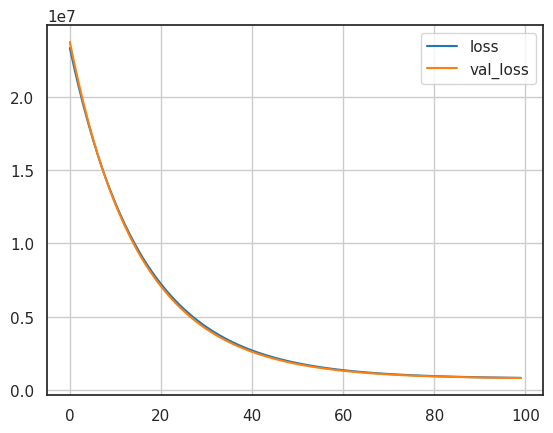

In [39]:
plot_loss(history)

We can see that with all the inputs in the regression model, it achieves a much lower training and validation error, and RMSE than the `temp_model` that had just one input.


In [40]:
y_pred = linear_model.predict(test_features)
print(np.sqrt(mean_squared_error(test_labels, y_pred)))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
902.6181669971414


In [41]:
# Print column names for reference
print("Column names")
print(test_features.columns)

# Print weights and biases for each layer
for layer in linear_model.layers:
    print("Layer Name:", layer.name)
    print("---")
    print("Weights")
    print("Shape:",layer.get_weights()[0].shape, '\n', layer.get_weights()[0])
    print("---")
    print("Bias")
    print("Shape:",layer.get_weights()[1].shape, '\n', layer.get_weights()[1], '\n')

Column names
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')
Layer Name: normalization
---
Weights
Shape: (11,) 
 [2.4820514  0.50598294 6.557265   0.02735043 2.9931624  0.6803419
 1.4        0.49609548 0.47542128 0.6289289  0.19085288]
---
Bias
Shape: (11,) 
 [1.2274556e+00 2.4996421e-01 1.1894584e+01 2.6602382e-02 4.0580730e+00
 2.1747680e-01 2.9811966e-01 3.2840721e-02 2.6041929e-02 2.0187266e-02
 6.0876710e-03] 

Layer Name: dense_1
---
Weights
Shape: (11, 1) 
 [[ 360.61386]
 [ 993.9573 ]
 [  48.62933]
 [-138.16786]
 [ 156.26776]
 [  75.83614]
 [-356.2001 ]
 [ 476.30438]
 [ 513.3944 ]
 [-164.15648]
 [-212.52162]]
---
Bias
Shape: (1,) 
 [4292.859] 



From the model weights, we can see that, similar to what we had seen in our heatmap, `yr`, `temp` and `atemp` have the highest model weights, and hence contribute the most the `cnt` predictions.


## Using Neural Networks for Linear Regression


In this section, we will use a Neural Network architecture in Keras to perform simple linear regression.


Let us begin by reading our univariate dataset. We will use the Iowa Housing dataset where the only feature is SquareFeet, and the target value is SalePrice.


We will reserve the last 500 data points for testing purposes.


In [42]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L2/data/IowaHousingPrices.csv')

x_train = df[['SquareFeet']].values[1:-500]
y_train = df[['SalePrice']].values[1:-500]
x_test = df[['SquareFeet']].values[-500:]
y_test = df[['SalePrice']].values[-500:]

Now, we'll define the model configuration parameters. Since we're dealing with a univariate dataset, both our input and output sizes are 1. The learning rate is selected arbitrarily, where the goal is to ensure the NN doesn't overfit to the training data, and is easily generalizable to unseen test sets. We will use mean squared error as the loss function, and train the model on 30 iterations.


In [43]:
output_size=1
hidden_layer=500
input_size=1
learning_rate=0.51
loss_function='mean_squared_error'
epochs=30
batch_size=10

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer, activation='relu'),
    tf.keras.layers.Dense(output_size)
])

In [46]:
model.compile(tf.keras.optimizers.Adam(learning_rate=learning_rate), loss_function)

In [48]:
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/30


96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7293541888.0000
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3683437824.0000
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4075109888.0000
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3492423680.0000
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3183303424.0000
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3746587392.0000
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3325736960.0000
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3623147008.0000
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3422348544.0000
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3425901056.0000
Epoch 11/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3419650560.0000
Epoch 12/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3415405056.0000
Epoch 13/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3225627648.0000
Epoch 14/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms

In [49]:
x = np.arange(x_test.min(), x_test.max(), 10).reshape(-1, 1)

In [50]:
y_pred = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


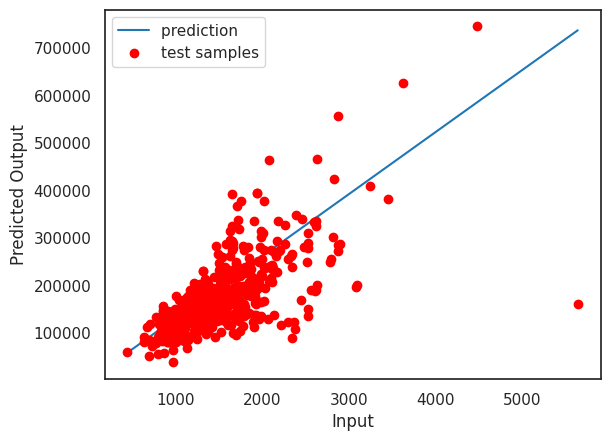

In [51]:
plt.plot(x, y_pred, label="prediction ")
plt.plot(x_test, y_test, 'ro', label="test samples")
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.legend()
plt.show()

The model performs relatively well on the test set.


# Exercises


In this section, you will train a linear regression model in Keras. We will be using the classic Auto MPG dataset, and predict the fiel efficiency of automobiles.


### Exercise 1 - Loading a dataset (Auto MPG)


In [75]:
# Write your solution here:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module1/L2/data/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

In [76]:
raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [77]:
raw_dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

### Exercise 2 - Clean the data


Drop all the rows that have NA values, and remove the `origin` column as it is categorical.


In [78]:
raw_dataset.dropna(inplace=True)

In [79]:
raw_dataset.drop('Origin', axis=1, inplace=True)

In [80]:
raw_dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year'],
      dtype='object')

### Exercise 3 - Split the data


In [81]:
train_dataset = raw_dataset.sample(frac=0.8, random_state=0)
test_dataset = raw_dataset.drop(train_dataset.index)

train_features = raw_dataset.copy()
test_features = raw_dataset.copy()

train_labels = raw_dataset['MPG']
test_labels = raw_dataset['MPG']

### Exercise 4 - Create a normalization layer


Next, use `tf.keras.layers.Normalization` to add feature normalization to the model. Using `normalization.adapt`, fit the state of the pre-processing layer to the training data. Calculate and print the mean and variance.


In [82]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

[[  23.445919     5.4719386  194.41199    104.46939   2977.5842
    15.5413265   75.97959  ]]
[[6.0762737e+01 2.9022739e+00 1.0922433e+04 1.4777899e+03 7.1964419e+05
  7.5919147e+00 1.3535297e+01]]


### Exercise 5 - Linear regression with multiple inputs


Create a linear regression model to predict `MPG` based on all inputs in the dataset. In this case, in our $y = mx+b$ equation, $m$ will be a matrix and $b$ will be a vector.

Similar to what we did before, the Sequential model will have `normalizer` as the first layer, and `Dense` as the second layer. Compile and train the model, and plot the training history.


In [83]:
linear_model2 = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [84]:
linear_model2.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss='mean_squared_error'
)

In [85]:
history = linear_model2.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

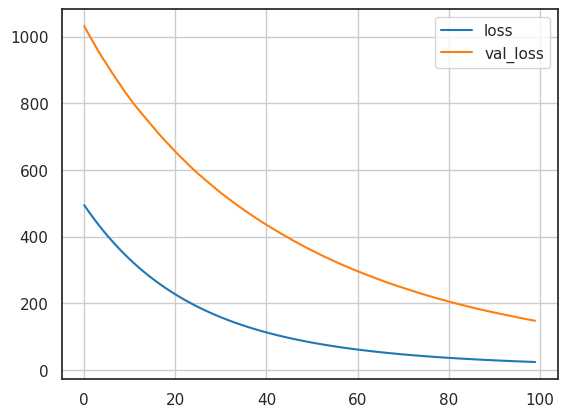

In [87]:
plot_loss(history)

Predict the output values of the test set, and compute the RMSE.


In [88]:
y_pred = linear_model2.predict(test_features)
print(np.sqrt(mean_squared_error(test_labels, y_pred)))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6.961425241525054
